#Data Story Project "London Underground data"

***

##Description and data sources

The current project aims to provide useful insights on usage of London tube and help Londoners to plan their journeys.
The project uses two data sets:

   ** 1. Oyster card data**
   
    This dataset provides a 5% sample of all Oyster card journeys performed in a week during November 2009 on bus, Tube, DLR and London Overground.
    
   ** 2. London Underground passenger counts data**
    
    Passenger counts collects information about passenger numbers entering and exiting London Underground stations, largely based on the Underground ticketing system gate data.
    
**Data source: "Transport for London" (https://api-portal.tfl.gov.uk/)**

***

##Loading modules

In [2]:
import pandas as pd
import numpy as np
import os
import folium

%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'serif'})

import warnings
warnings.filterwarnings('ignore')

***

##Loading data

In [3]:
data_folder = 'C:\\data_science_intensive\\Data_story_project\\London Underground data'
os.chdir(data_folder)

***

### Importing Oyster card data

In [4]:
file_oyster = 'Nov09JnyExport.csv'
data_oyster = pd.read_csv(file_oyster)
len(data_oyster) #the data set contains 2623487 data entries

2623487

**Column descriptions**

- downo - a number between 1 and 7, 1 being Sunday, 2 being Monday etc
- daytype - Sun to Sat
- SubSystem - the mode(s) of the journey. LUL - London Underground, NR - National Rail, LTB - London Buses, DLR- Docklands Light - Railway, LRC - London Overground, TRAM - Croydon Tram
- StartStn - Station the journey started at
- EndStation - Station the journey ended at
- EntTime - Entry time of the journey in minutes after midnight
- EntTimeHHMM - Entry time in HH:MM text format
- ExTime - Exit time of the journey in minutes after midnight
- EXTimeHHMM - Exit time in HH:MM text format
- ZVPPT - zones of Oyster Season ticket, if used
- JNYTYP - Product types involved in the journey. PPY - Pure PAYG, TKT - Pure Oyster Season, MIXED - Combined PAYG and Oyster  Season
- DailyCapping - it shows as Y when PAYG journey was capped
- FFare - Full PAYG Fare before any discounts
- Dfare - PAYG Fare after usage based discounts
- RouteID - The Route Number of the Bus, if a Bus has been boarded
- FinalProduct - Combined Product Description used for journey

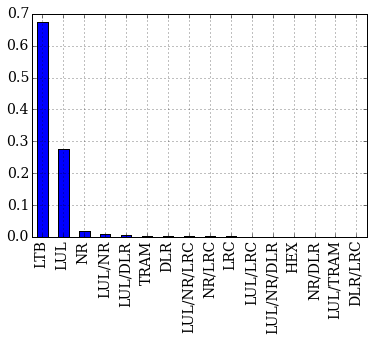

In [5]:
df_subsystems = (data_oyster.SubSystem).value_counts()/len(data_oyster)
df_subsystems.plot(kind = 'bar')

The majority of data entries are related to trips by London Buses (67%) and London Tube (28%)

In [6]:
#Bus
data_oyster_bus = data_oyster[data_oyster.SubSystem == 'LTB']
# Removing irrelevant columns (for example, there is no information on exit time of the journey if a Bus was used)
data_oyster_bus.drop(['StartStn','EndStation', 'ExTime', 'EXTimeHHMM', 'FFare', 'DFare'], axis=1, inplace=True)

In [7]:
#Tube
data_oyster_tube = data_oyster[data_oyster.SubSystem == 'LUL']

In [8]:
data_oyster_tube.StartStn.unique() #StartStn column contains 'Unstarted' values (20283 rows in total)
len(data_oyster_tube[data_oyster_tube.StartStn == 'Unstarted'])
data_oyster_tube = data_oyster_tube[data_oyster_tube.StartStn != 'Unstarted'] #removing rows that have no information of start stations

In [9]:
data_oyster_tube.EndStation.unique()
len(data_oyster_tube[data_oyster_tube.EndStation == 'Not Applicable']) #EndStation column contains 'Not Applicable' values (1 row)
data_oyster_tube = data_oyster_tube[(data_oyster_tube.EndStation != 'Not Applicable') & (data_oyster_tube.EndStation !='Unfinished')] #removing rows that have no information of end stations

***

### Importing London Underground passenger counts data

In [10]:
file_count_weekday = 'En 12Week.xls'
file_count_sat = 'En12sat.xls'
file_count_sun = 'En12sun.xls'

In [11]:
def read_xls_count_data(filename, Sheetname, ncolsskip):
    df = pd.read_excel(filename, Sheetname, skiprows = 6,skip_footer =2)
    df.drop(df.columns[-ncolsskip:], axis=1, inplace=True)
    df.drop(['nlc', 'Date', 'Note'], axis=1, inplace=True)
    df = df.set_index('Station')
    del df.index.name
    df['Total'] = df.sum(axis =1)
    return df

In [12]:
data_counts_week = read_xls_count_data(file_count_weekday, 'En Wk 12',7)
data_counts_sat = read_xls_count_data(file_count_sat, 'En SAT 2012',2)
data_counts_sun = read_xls_count_data(file_count_sun, 'En SUN 2012',2)

***

##Busiest stations 

###London Underground passenger counts data

What are the busiest stations? (Bar plots; weekdays, Saturdays and Sundays separetly)

In [127]:
def plottopN(dfs, N, title, width = 0.25,color = 'black'):
    
    
    df = pd.DataFrame(dfs.order(ascending = False).head(N)) # selecting top N from the data Frame
    
    ind = np.arange(N)  # the x locations for the groups
    
    rects1 = plt.barh(ind, df['Total']/1000, width, alpha = 0.5, color=color)

    plt.yticks(ind+0.5*width)
    plt.gca().invert_yaxis()
    plt.gca().yaxis.tick_right()
    plt.title(title, fontweight = 'bold', fontsize = 20)
    plt.grid()
    plt.xlim([0,140])
    ytickNames = plt.gca().set_yticklabels(df['Total'].index)
    plt.setp(ytickNames, rotation=0, fontsize=14, fontweight = 'bold')
    

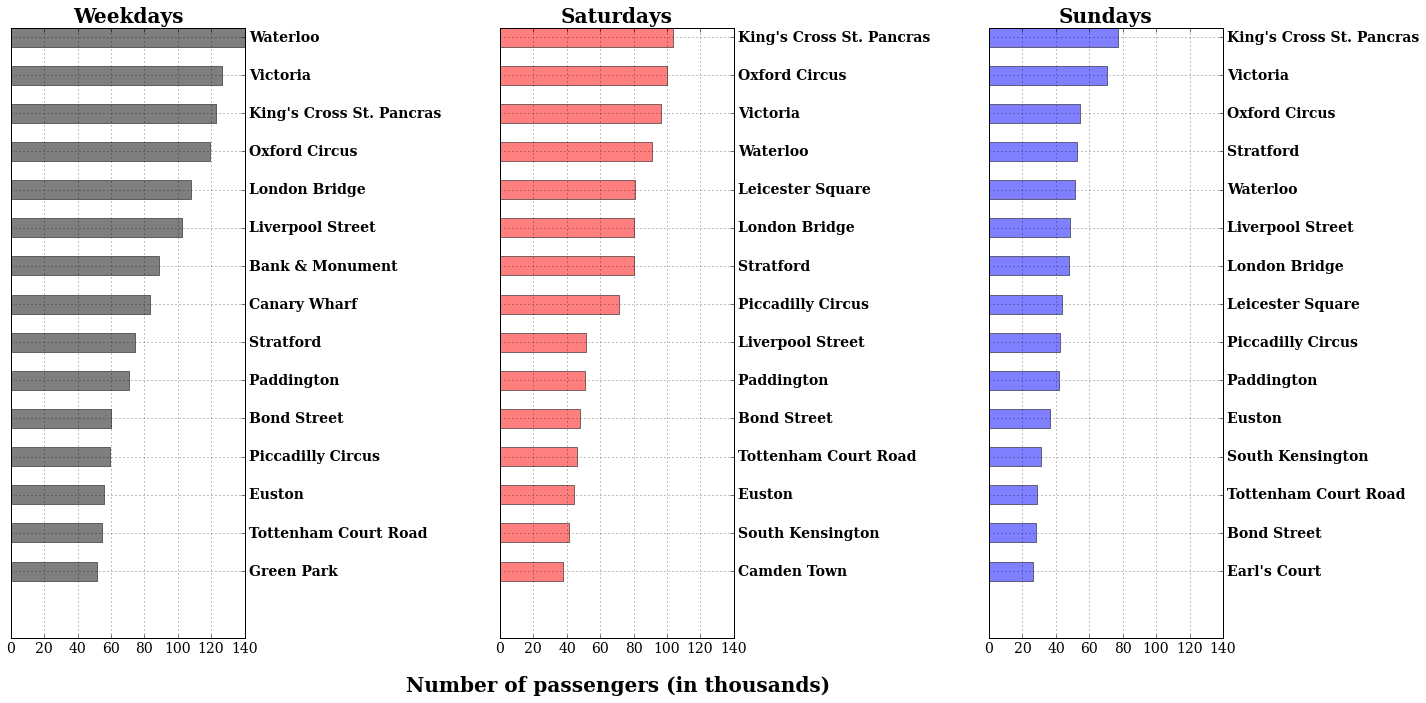

In [141]:
fig = plt.figure(figsize = (20,10))


N = 15 ## How many most busi
                
#plt.suptitle('London Underground passenger counts data', fontweight = 'bold', fontsize = 20) OVERLAPS!!
plt.subplot(131)
plottopN(data_counts_week['Total'], N, 'Weekdays', width = 0.5,color = 'black')

plt.subplot(132)
plottopN(data_counts_sat['Total'], N, 'Saturdays', width = 0.5,color = 'red')
plt.xlabel('Number of passengers (in thousands)', fontweight = 'bold', fontsize = 20, labelpad=20)

plt.subplot(133)
plottopN(data_counts_sun['Total'], N, 'Sundays', width = 0.5,color = 'blue')

plt.tight_layout()


What are the busiest stations? (Bar plots; weekdays, Saturdays and Sundays stucked)

In [175]:
N = 20 #How many stations I want to consider?

In [176]:
data_counts = pd.concat([data_counts_week['Total'], data_counts_sat['Total'], data_counts_sun['Total']], axis = 1)
data_counts.columns = ['Week', 'Saturday','Sunday']
data_counts['All_together'] = data_counts.sum(axis = 1)
data_counts_top10 = data_counts.sort(['All_together'], ascending=0).head(N)
data_counts_top10

,Week,Saturday,Sunday,All_together
King's Cross St. Pancras,122769,103623,76905,303297
Victoria,126275,96658,70312,293245
Waterloo,139941,91036,51622,282599
Oxford Circus,119401,99998,54154,273553
London Bridge,107944,80397,47723,236064
Stratford,74238,79991,52801,207030
Liverpool Street,102586,51748,48596,202930
Leicester Square,50622,80989,43586,175197
Piccadilly Circus,59135,71545,42387,173067
Paddington,70505,51025,41569,163099


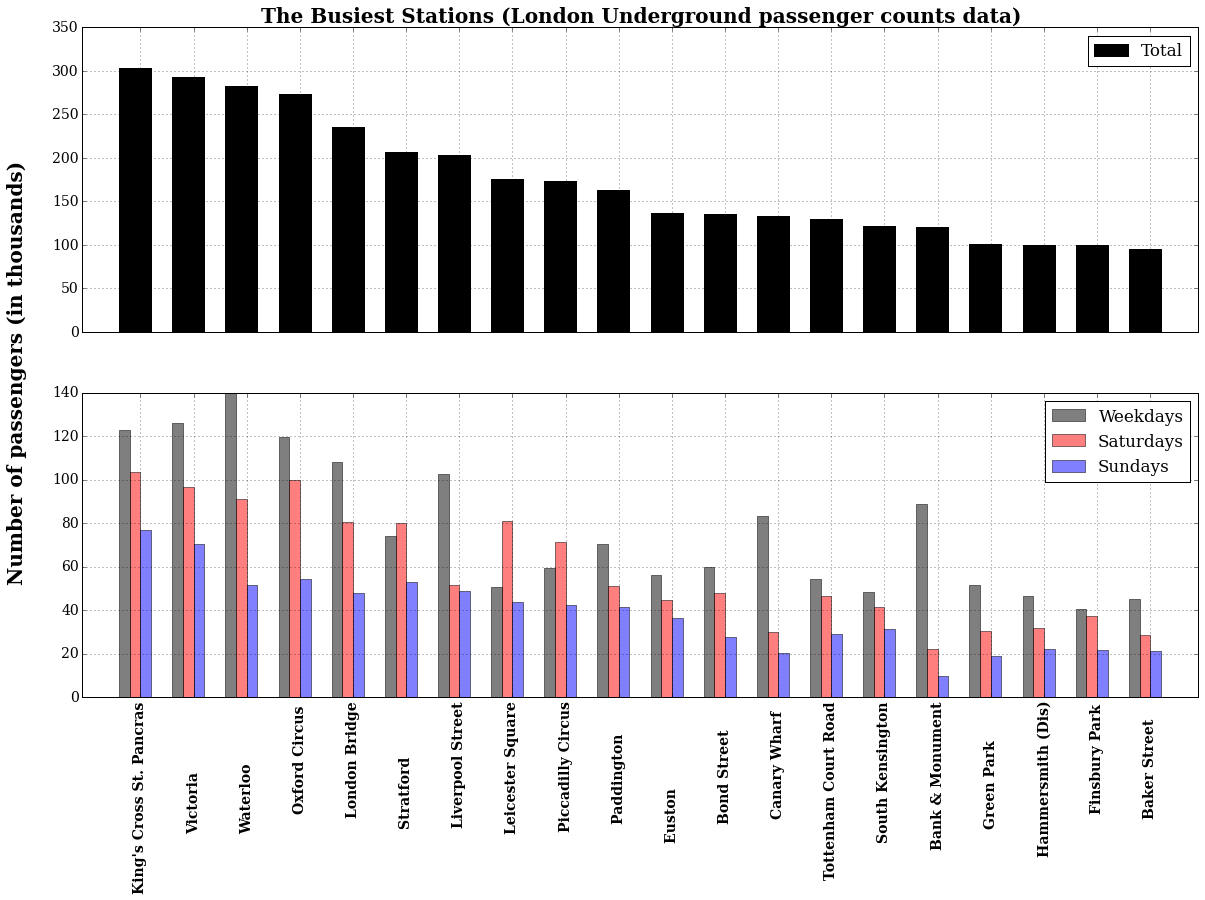

In [201]:
ind = np.arange(N)
width = 0.2

fig = plt.figure(figsize = (20,12))
ax0 = plt.subplot(211)
ax0.bar(ind, data_counts_top10['All_together']/1000,width*3,color='k',align='center', label = 'Total')
ax0.set_xlim([-1,N])
ax0.xaxis.set_major_formatter(plt.NullFormatter())
plt.grid()
plt.xticks(ind+0.5*width)
plt.legend(loc = 'best')
plt.title('The Busiest Stations (London Underground passenger counts data)', fontweight = 'bold', fontsize = 20)

ax = plt.subplot(212)
ax.bar(ind-width, data_counts_top10['Week']/1000,width, alpha = 0.5, color='k',align='center', label = 'Weekdays')
ax.bar(ind, data_counts_top10['Saturday']/1000,width,alpha = 0.5,color='r',align='center', label = 'Saturdays')
ax.bar(ind+width, data_counts_top10['Sunday']/1000,width, alpha = 0.5,color='b',align='center',label = 'Sundays')
plt.legend(loc = 'best')
plt.grid()
plt.xticks(ind+0.5*width)
plt.xlim([-1,N])
xtickNames = plt.gca().set_xticklabels(data_counts_top10.index, fontweight = 'bold', rotation = 90)

fig.text(0.08, 0.5, 'Number of passengers (in thousands)', fontweight = 'bold', fontsize = 20, ha='center', va='center', rotation='vertical')

##Oyster card data

In [344]:
data_oyster_tube['DayType'] = data_oyster_tube.downo
data_oyster_tube['DayType'][data_oyster_tube.DayType == 1] = 'Sunday'
data_oyster_tube['DayType'][data_oyster_tube.DayType == 7] = 'Saturday'
data_oyster_tube['DayType'][(data_oyster_tube.DayType < 7) & (data_oyster_tube.DayType > 1)] = 'Weekdays'

In [345]:
df1 = data_oyster_tube[['DayType', 'StartStn']]
df1['Entry']= 1
df1 = df1.groupby(['DayType', 'StartStn']).count()

df2 = data_oyster_tube[['DayType', 'EndStation']]
df2['Exit']= 1
df2 = df2.groupby(['DayType', 'EndStation']).count()

In [346]:
data_oyster_tube_counts = pd.concat([df1, df2], axis=1)
data_oyster_tube_counts.fillna(0, inplace=True)

In [347]:
data_oyster_tube_counts['Total'] = data_oyster_tube_counts.sum(axis = 1)

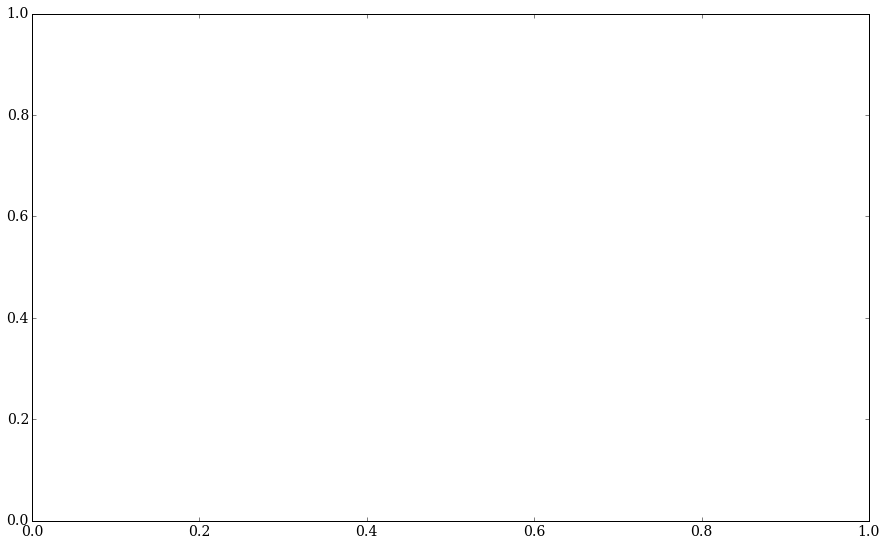

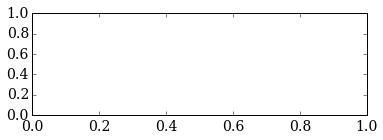

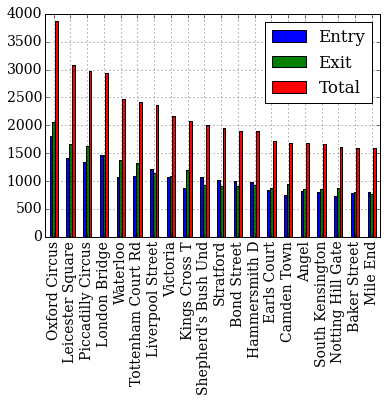

In [355]:
plt.figure(figsize = (15,20))
plt.subplot(211)
df = data_oyster_tube_counts.query('ilevel_0 == "Weekdays"').sort('Total', ascending = False).head(20).reset_index(level = 0, drop = True)
df.plot(kind = 'bar')
plt.subplot(212)
df1 = data_oyster_tube_counts.query('ilevel_0 == "Saturday"').sort('Total', ascending = False).head(20).reset_index(level = 0, drop = True)
df1.plot(kind = 'bar')